# ロジスティック回帰

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

$$y=\frac{1}{1+\exp(x^T \beta)}$$

In [23]:
x = np.linspace(-5.0,5.0,200)

In [24]:
y = -x

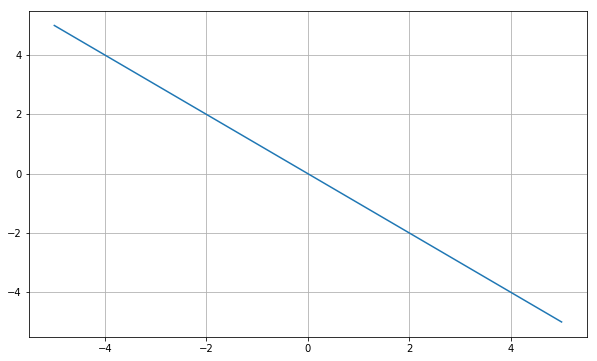

In [25]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [26]:
y = np.exp(-x)

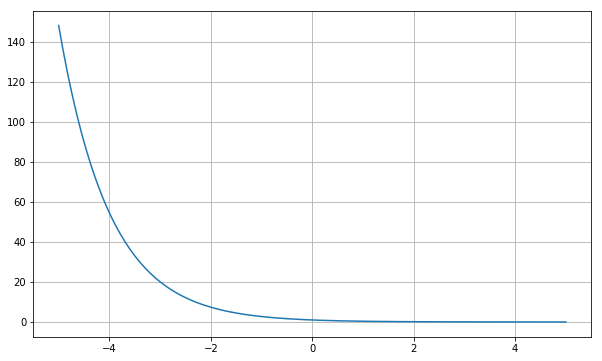

In [27]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [28]:
y = 1.0+np.exp(-x)

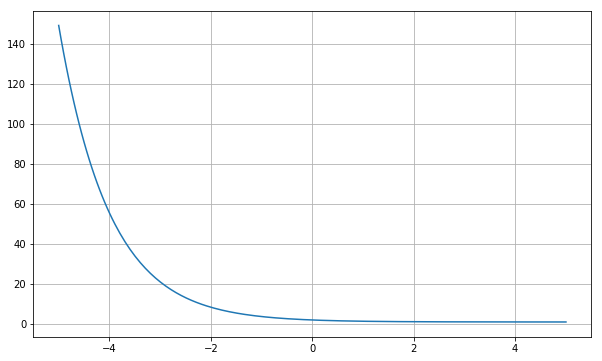

In [29]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

### ロジスティック・シグモイド関数

In [30]:
y = 1/(1.0+np.exp(-x))

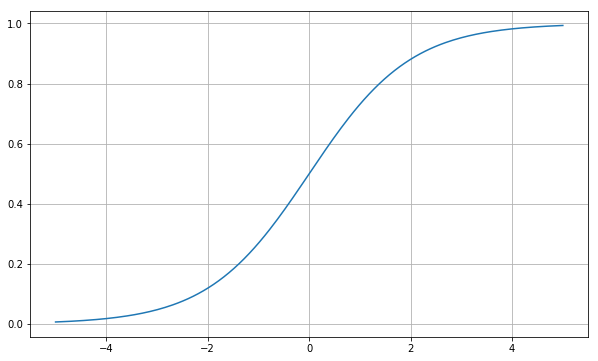

In [31]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [32]:
y = 1 - 1/(1.0+np.exp(-x))

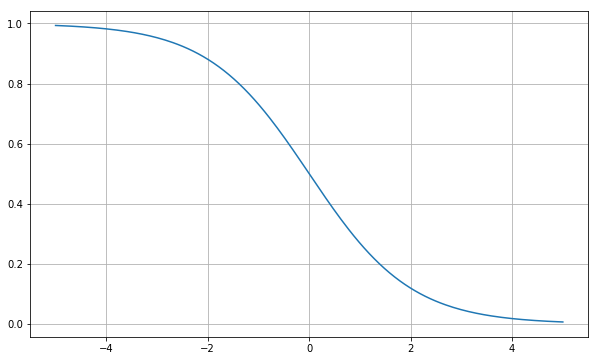

In [33]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

### オッズ

In [34]:
y = np.exp(x)

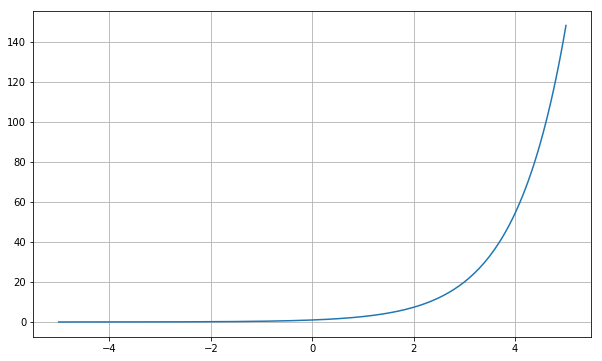

In [35]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

### 対数オッズ

In [36]:
y = x

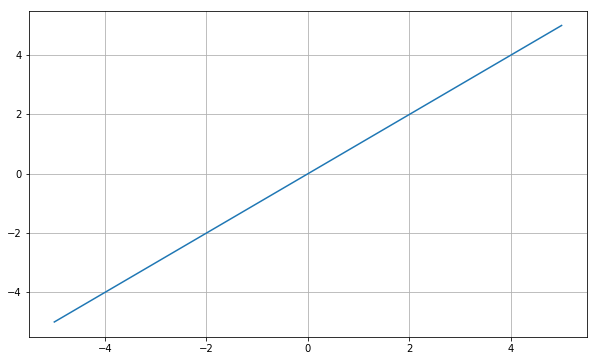

In [37]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

### 微分

商の微分
\begin{eqnarray}
(\frac{1}{f(x)})'&=&\lim_{h \rightarrow 0}\frac{\frac{1}{f(x+h)}-\frac{1}{f(x)}}{h}\\
&=&\lim_{h \rightarrow 0}\frac{f(x)-f(x+h)}{hf(x)f(x+h)}\\
&=&\lim_{h \rightarrow 0}-\frac{1}{f(x)f(x+h)}\frac{f(x+h)-f(x)}{h}\\
&=&-\frac{f'(x)}{\{ f(x)\}^2}
\end{eqnarray}

$$\{ 1+\exp(-x)\}'=-\exp(-x)$$

### ロジスティック関数の微分


$$f(x)=\frac{1}{1+\exp(-x)}$$

\begin{eqnarray}
f'(x)&=&-\frac{\{1+\exp(-x)\}'}{\{ 1+\exp(-x)\}^2}\\
&=&\frac{\exp(-x)}{\{ 1+\exp(-x)\}^2}\\
&=&\frac{1}{ 1+\exp(-x)}\frac{\exp(-x)}{ 1+\exp(-x)}\\
&=&\frac{1}{ 1+\exp(-x)}(\frac{1+\exp(-x)}{ 1+\exp(-x)}-\frac{1}{ 1+\exp(-x)})\\
&=&\frac{1}{ 1+\exp(-x)}(1-\frac{1}{ 1+\exp(-x)})\\
&=&f(x)(1-f(x))
\end{eqnarray}

In [40]:
y = 1/(1.0+np.exp(-x)) * (1 - 1/(1.0+np.exp(-x)))

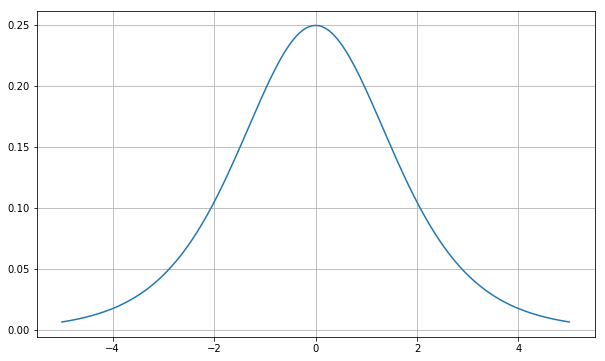

In [41]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

正規分布の確率密度関数に近い形状であり，最大は0.25

線形結合が正規分布に従うのに近いイメージ

## 正規分布

$$f(x)= \frac{1}{\sqrt{2 \pi \sigma^2}} \exp (- \frac{(x-\mu)^2 }{2 \sigma}) $$

In [46]:
y = x

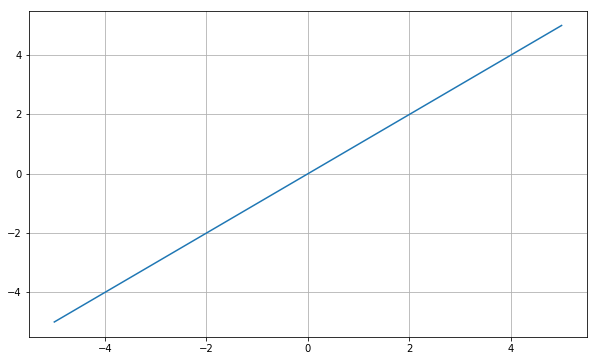

In [47]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [48]:
y = x*x

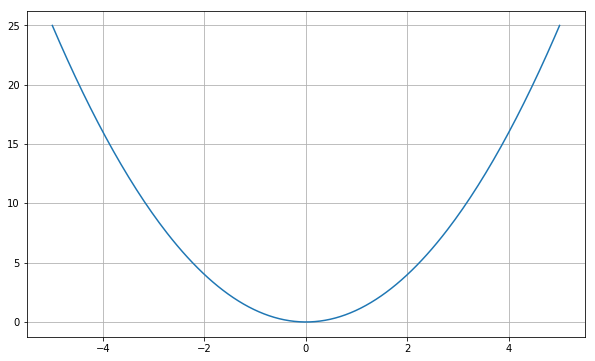

In [49]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [50]:
y = -x*x

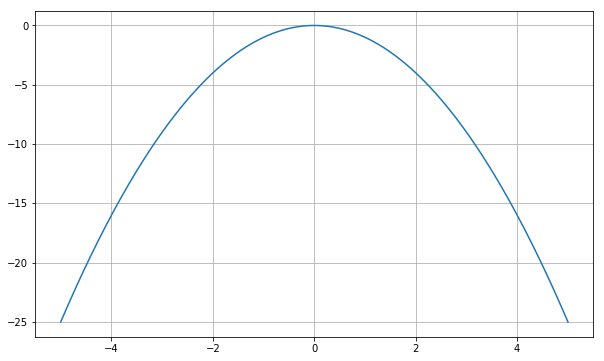

In [51]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [42]:
y = np.exp(x)

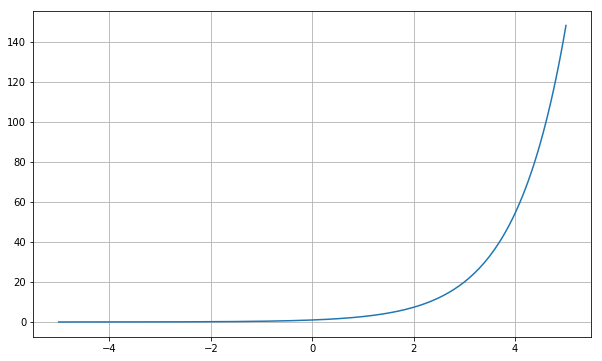

In [43]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [44]:
y = np.exp(-x)

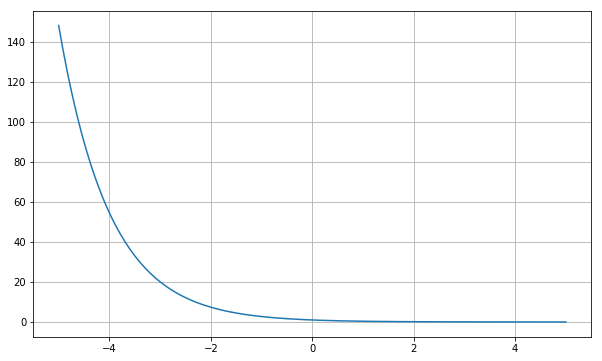

In [45]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [52]:
y = np.exp(-x*x)

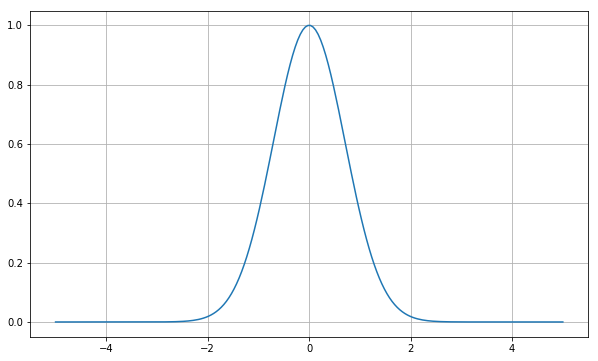

In [53]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [54]:
y = np.exp(-x*x/2)

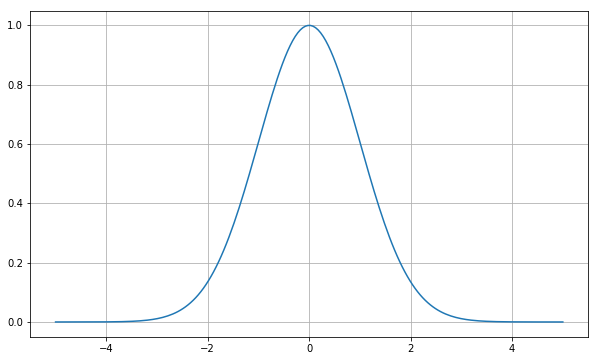

In [55]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

In [56]:
y = np.exp(-x*x/2)/np.sqrt(2*np.pi)

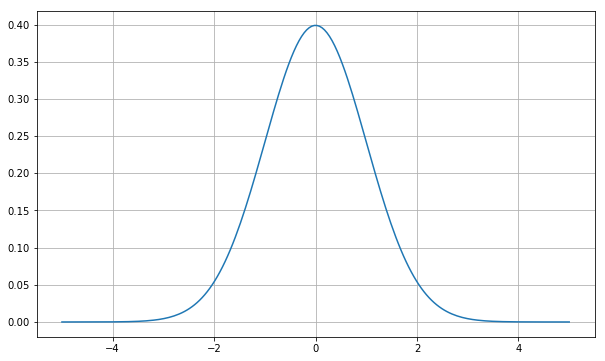

In [57]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y)

## 比較

In [58]:
y1 = np.exp(-x*x/2)/np.sqrt(2*np.pi)
y2 = 1/(1.0+np.exp(-x)) * (1 - 1/(1.0+np.exp(-x)))

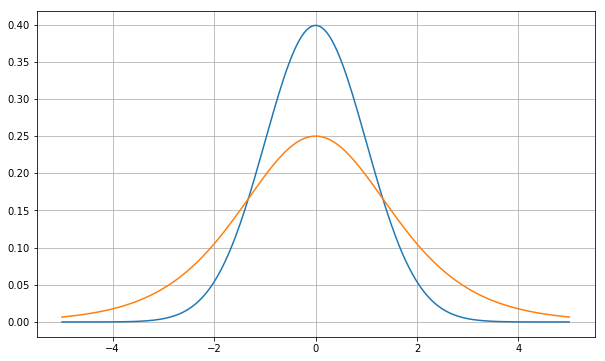

In [59]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y1)
plt.plot(x,y2)

In [64]:
sigma = 1.6
y1 = np.exp(-x*x/2/sigma)/np.sqrt(2*np.pi)/sigma
y2 = 1/(1.0+np.exp(-x)) * (1 - 1/(1.0+np.exp(-x)))

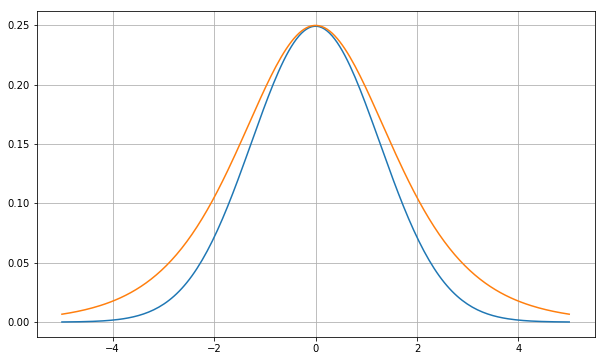

In [65]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(x,y1)
plt.plot(x,y2)

### ランダムなデータ

In [101]:
t = np.random.randint(low=0,high=2,size=50)
t

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0])

In [102]:
feature = np.random.normal(loc=0.0,scale=1.0,size=(50,1))
feature

array([[-2.14042691],
       [ 2.0167091 ],
       [-1.93515053],
       [-0.84962234],
       [ 0.00696831],
       [ 0.05599705],
       [ 0.27702212],
       [-0.13599256],
       [-0.58376047],
       [-2.33530416],
       [-0.13278525],
       [ 1.37194917],
       [-1.05036142],
       [ 0.36514903],
       [ 0.34658383],
       [ 1.33060597],
       [-0.05221604],
       [ 0.04989248],
       [ 1.55649062],
       [ 1.50079871],
       [ 2.15800604],
       [-0.21525404],
       [ 0.07452216],
       [-1.27216984],
       [ 1.67434467],
       [-0.46831035],
       [ 0.38048164],
       [-0.59955193],
       [ 2.06752336],
       [-0.08758334],
       [-1.5508746 ],
       [-1.17399645],
       [ 0.38214521],
       [ 1.06377106],
       [-1.23800545],
       [-0.55810985],
       [ 0.96800664],
       [ 1.69194512],
       [ 1.09204903],
       [-0.30584703],
       [-0.46768246],
       [ 0.42780346],
       [ 1.00161568],
       [ 0.0905539 ],
       [-0.93426715],
       [-1

In [103]:
m = LogisticRegression(penalty='l2',C=10000,fit_intercept=True)

In [104]:
m.fit(feature,t)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

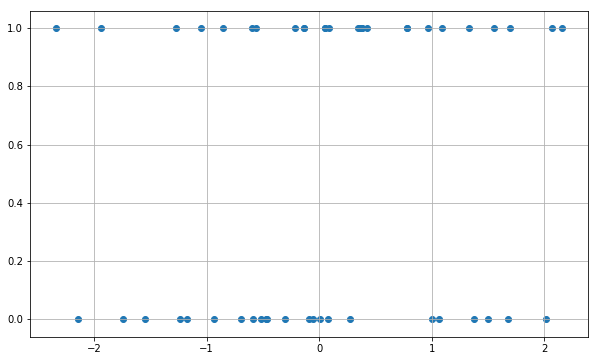

In [105]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(feature,t)

In [106]:
predict = m.predict(x.reshape((200,1)))

In [107]:
y = 1/(1.0+np.exp(-x))

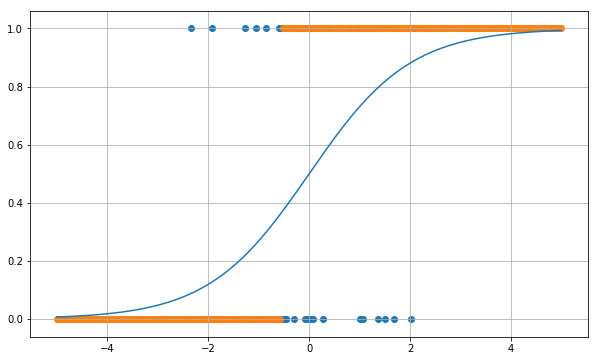

In [108]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(feature,t)
plt.scatter(x,predict)
plt.plot(x,y)